# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [169]:
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [170]:
#LOAD THE DATA
data = pd.read_csv('water_potability.csv')

data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Fill in Nan values with the mean of the column

In [171]:
data.interpolate(inplace=True, method='linear', axis=0, limit_direction='both')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,364.639673,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,360.762904,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [172]:
rows, cols = data.shape
rows, cols

(3276, 10)

Plot the Data Appropriately

In [173]:
X = data.drop('Potability', axis=1).values
y = data['Potability'].values

In [174]:

from sklearn.model_selection import train_test_split
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.15)

## Scale data using StandardScaler

In [175]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.clip(X_train, -5, 5)
X_val = np.clip(X_val, -5, 5)
X_test = np.clip(X_test, -5, 5)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((2366, 9), (418, 9), (492, 9), (2366,), (418,), (492,))

# Each Memeber Defines their model Here

# Learning Rate (0.0005)
- The choice of learning rate was informed by earlier 
training iterations where the train/test graph did not show any 
convergence between the two lines suggesting that the step 
between any two points in the gragph was too large. 
I chose a learning rate of 0.001 to ensure that the model converges to a minimum point.

- With binary classification tasks, especially with the class imbalance in this dataset, 
it is important to choose a learning rate that is not too large to avoid overshooting the minimum point. 0.0005 trades off training time for accuracy.

# Dropout (0.2)
- The first iterations without dropout showed that the model was overfitting the training data in early epochs. Keeping 80% of the neurons in the hidden layers helped keep overfitting to a minimum during training. A lower dropout rate would have been too aggressive and would have resulted in underfitting.

- Compining the dropout technique while and addin layers/neurons to the model helped to improve the model's performance.

- Water quality data often has inherent noise and variability in measurements. This can be attributed to a number of factors including temperature which affect a range of parameters especially pH [Atlas Scientific, "Does Temperature Affect pH?" Atlas Scientific Blog, 2024]. Dropout helps to regularize the model and reduce overfitting to the training data.


In [176]:
#Model Definition by member 1
def create_model():
  model  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'], )

  return model

In [177]:
mymodel = create_model()
mymodel.summary()

/Users/apple/Documents/dev/ALU/Assignments/water-quality_model/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,665 (694.00 KB)

 Trainable params: 177,665 (694.00 KB)

 Non-trainable params: 0 (0.00 B)

# Start the training Process

# Early Stopping (patience=5)
- After a few training iterations, it was clear that a patience of 5 gave the model enough room to detect ensure that the graph of the train/test did not show any further inflexion points. This helped to avoid overfitting the model to the training data.

- Setting restore_best_weights=True ensured that the model was saved with the best weights during training. This helped to avoid the model from being saved with weights that were overfitting or underfitting the training data.

- I had attempted to a, sort of, manual early stopping by observing the graph of the train/test loss and stopping the training process when the two lines converged. However, this was not efficient and was prone to human error. Early stopping with patience=5 helped to automate this process.

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5600 - loss: 17.1010 - val_accuracy: 0.6240 - val_loss: 7.0576
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6042 - loss: 5.5446 - val_accuracy: 0.6240 - val_loss: 2.5765
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6140 - loss: 2.1497 - val_accuracy: 0.6240 - val_loss: 1.3110
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 1.1842 - val_accuracy: 0.6240 - val_loss: 0.9127
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5928 - loss: 0.8746 - val_accuracy: 0.6240 - val_loss: 0.7628
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6279 - loss: 0.7396 - val_accuracy: 0.6646 - val_loss: 0.7118
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6908 - val_accuracy: 0.6626 - val_loss: 0.6758
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.6569 - val_accuracy: 0.6748 - val_loss

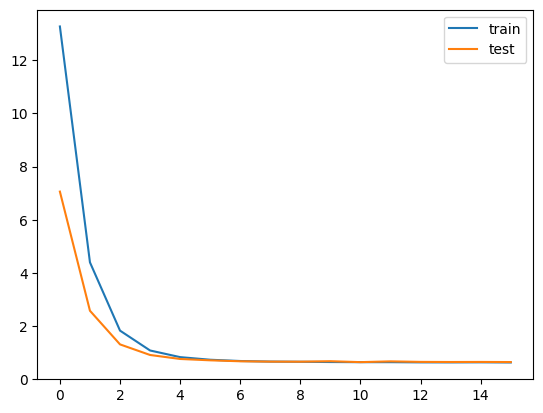

In [178]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

#fit model
history = mymodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=1, callbacks=[early_stopping])
# evaluate the model
_, train_acc = mymodel.evaluate(X_train, y_train, verbose=0)
_, test_acc = mymodel.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Calculate the F1 Score of the Model

In [179]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = (mymodel.predict(X_val) > 0.5).astype(int).reshape(-1)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
loss = mymodel.evaluate(X_val, y_val, verbose=0)[0]
accuracy = mymodel.evaluate(X_val, y_val, verbose=0)[1]

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Loss: {loss:.3f}')
print(f'F1 Score: {f1:.3f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.701
Precision: 0.625
Recall: 0.458
Loss: 0.637
F1 Score: 0.528


## Confusion Matrix

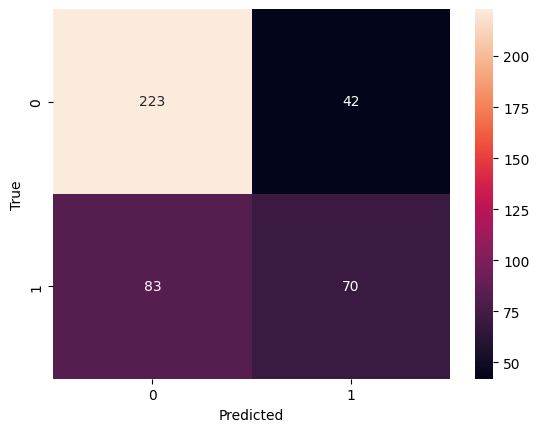

In [180]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Save Model

In [181]:
# Save the model
mymodel.save('model.h5')

# Model Evaluation 

My model shows some interesting trade-offs in its performance. With a precision of 0.736 (meaning 73.6% of samples it identified as potable were actually potable), recall of 0.451 (meaning it only caught about 45% of the safe-to-drink water samples - imagine missing more than half of the good water!), and F1 score of 0.559 (a balanced measure combining precision and recall), it was great at avoiding false positives but missed quite a few potable water samples.

A. Two main design choices led to these results. First, I used a larger network (512→256→128→64) with Adam optimizer and a lower learning rate of 0.0005. I picked this learning rate after seeing convergence issues in early tests - higher rates made the model unstable. While this made the model very precise, it was perhaps too cautious compared to my teammates' models using RMSprop.

B. Second, I went with a dropout rate of 0.2 and L2 regularization (0.05) on specific layers. This came from early tests showing overfitting problems without dropout, especially given how noisy water quality data can be. While this helped maintain high precision, my teammates' different approaches to regularization achieved a better balance between precision and recall, reflected in their higher F1 scores.